In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pickle
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [2]:
# Set random seed
np.random.seed(42)

In [3]:
# Load the data
df1 = pd.read_csv('Duolingo_data_03_07_final_standardized.csv')
df2 = pd.read_csv('Duolingo_en_es_data_03_11_final_standardized.csv')
df3 = pd.read_csv('Duolingo_es_en_data_03_11_final_standardized.csv')
concat_df = pd.concat([df1, df2, df3], ignore_index=True)
concat_df = concat_df.dropna()
print(f"Dataset shape: {concat_df.shape}")
concat_df.head()

Dataset shape: (5520, 20)


,user_id,block_average_correctness,reverse_tap_average_correctness,reverse_translate_average_correctness,listen_average_correctness,block_average_response_time,reverse_tap_average_response_time,reverse_translate_average_response_time,listen_average_response_time,user_ability_score,average_blocks_per_session,average_blocks_per_day,average_sessions_per_day,session_length_variance,blocks_per_session_variance,blocks_per_day_variance,sessions_per_day_variance,response_time_variance,churn_time,churn_time_category
0,+4kwmfjD,0.227673,0.133858,0.378947,0.375000,0.002246,0.031466,0.003641,0.008832,0.610942,0.508028,0.514156,0.444444,0.755147,0.789055,0.000000,0.000000,0.163987,0.0,1
1,+IUzKF2l,0.332900,0.212815,0.500000,0.607595,0.002769,0.033279,0.003321,0.011009,0.646135,0.177752,0.045300,0.000000,0.329076,0.356443,0.441670,0.000000,0.237942,22.0,3
2,+Xv/6Nop,0.229710,0.140162,0.375000,0.397849,0.005831,0.044804,0.004645,0.015200,0.606883,0.300131,0.130238,0.133333,0.539885,0.622328,0.744112,0.225838,0.784566,5.0,1
3,+mMyHsNU,0.239135,0.000000,0.250307,0.225892,0.004481,0.000000,0.001964,0.008600,0.613978,0.322248,0.283126,0.355556,0.775884,0.715246,0.800309,0.458726,0.536977,6.0,1
4,+ziSnwWC,0.169845,0.065789,0.266409,0.328947,0.005608,0.024309,0.006240,0.010858,0.590596,0.069626,0.036523,0.166667,0.320580,0.380484,0.539567,0.252993,0.495177,13.0,2


In [4]:
# Basic statistics
print("\nBasic statistics:")
concat_df.describe()


Basic statistics:


,block_average_correctness,reverse_tap_average_correctness,reverse_translate_average_correctness,listen_average_correctness,block_average_response_time,reverse_tap_average_response_time,reverse_translate_average_response_time,listen_average_response_time,user_ability_score,average_blocks_per_session,average_blocks_per_day,average_sessions_per_day,session_length_variance,blocks_per_session_variance,blocks_per_day_variance,sessions_per_day_variance,response_time_variance,churn_time,churn_time_category
count,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000,5520.000000
mean,0.127424,0.041449,0.194103,0.159599,0.020245,0.009333,0.009305,0.013530,0.554135,0.069827,0.119067,0.146849,0.439228,0.448552,0.562488,0.214473,0.500728,9.873551,1.801630
std,0.069077,0.038920,0.105428,0.136590,0.058650,0.042329,0.041077,0.046566,0.042898,0.066373,0.115071,0.110831,0.128472,0.135649,0.155408,0.153207,0.288610,6.354933,0.772064
min,0.009470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.079292,0.014493,0.117780,0.073293,0.004292,0.002329,0.002075,0.003639,0.532826,0.031948,0.051621,0.071429,0.353790,0.358744,0.481793,0.097704,0.250992,4.000000,1.000000
50%,0.112987,0.033460,0.171736,0.122837,0.007112,0.003679,0.004107,0.006164,0.550076,0.050704,0.084310,0.122449,0.428862,0.439038,0.568127,0.180214,0.500819,9.000000,2.000000
75%,0.161454,0.059462,0.244444,0.199165,0.012598,0.005847,0.006604,0.008837,0.573688,0.084933,0.141892,0.194535,0.519211,0.534992,0.657878,0.298717,0.750641,15.000000,2.000000
max,0.726654,0.379310,0.952596,1.000000,1.000000,1.000000,1.000000,1.000000,0.867552,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,3.000000


In [5]:
# Select features for PCA
# Exclude 'user_id', 'churn_time', and 'churn_time_category'
feature_columns = [col for col in concat_df.columns if col not in ['user_id', 'churn_time', 'churn_time_category']]
features = concat_df[feature_columns]

# Display the selected features
print(f"\nSelected features for PCA: {features.columns.tolist()}")
print(f"Number of features: {features.shape[1]}")


Selected features for PCA: ['block_average_correctness', 'reverse_tap_average_correctness', 'reverse_translate_average_correctness', 'listen_average_correctness', 'block_average_response_time', 'reverse_tap_average_response_time', 'reverse_translate_average_response_time', 'listen_average_response_time', 'user_ability_score', 'average_blocks_per_session', 'average_blocks_per_day', 'average_sessions_per_day', 'session_length_variance', 'blocks_per_session_variance', 'blocks_per_day_variance', 'sessions_per_day_variance', 'response_time_variance']
Number of features: 17


In [6]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Initial PCA to Determine Optimal Number of Components

In [7]:
# Apply PCA initially keeping all components
pca = PCA()
X_pca = pca.fit_transform(features_scaled_df)

In [8]:
# Extract eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

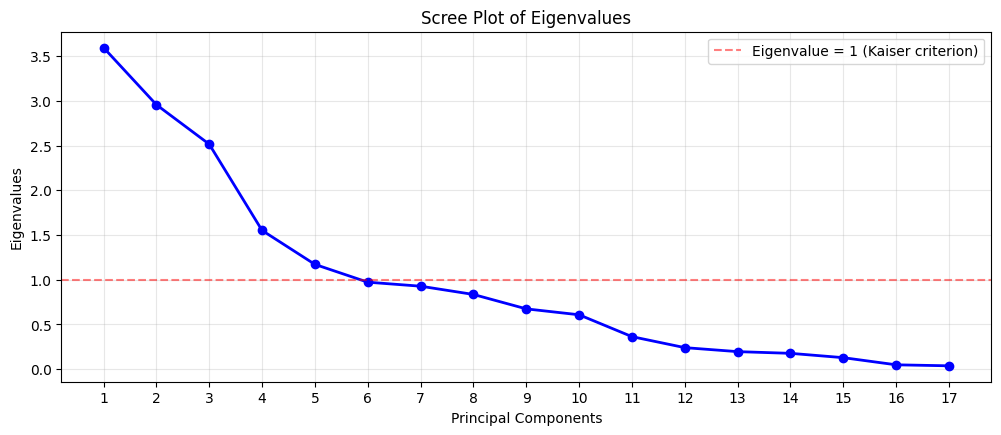

In [9]:
# Plot 1: Scree Plot - Eigenvalues
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='Eigenvalue = 1 (Kaiser criterion)')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.xticks(range(1, len(eigenvalues) + 1))
plt.grid(True, alpha=0.3)
plt.legend()

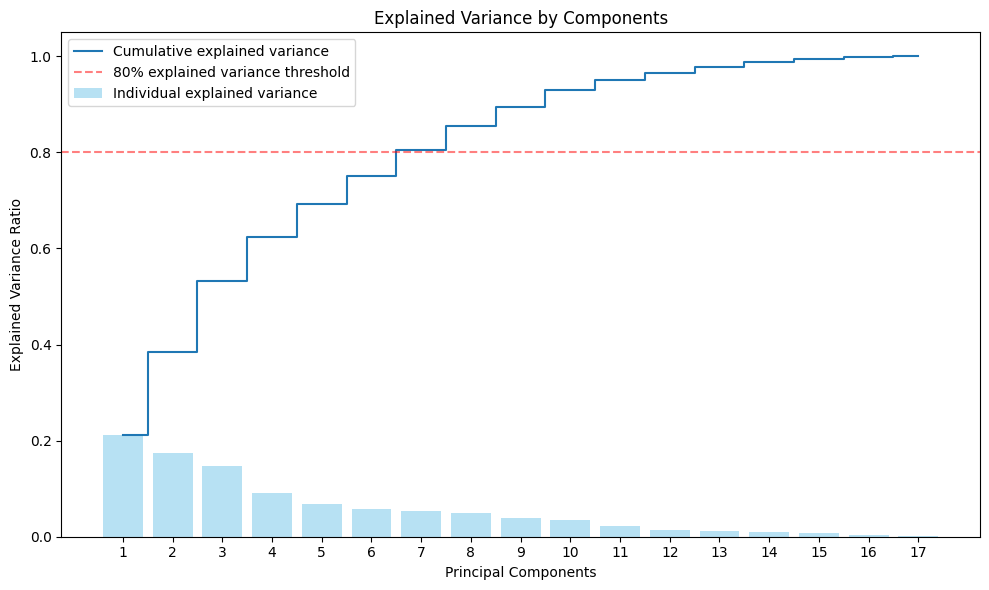

In [10]:
# Plot Cumulative Variance Explained
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='skyblue', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.5, label='80% explained variance threshold')
plt.title('Explained Variance by Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [11]:
# Kaiser Criterion: Select components with eigenvalues > 1.5
kaiser_components = sum(eigenvalues > 1.5)
print(f"\nNumber of components with eigenvalues > 1.5: {kaiser_components}")

# Find number of components that explain at least 80% of variance
variance_components = np.argmax(cumulative_explained_variance >= 0.8) + 1
print(f"Number of components needed to explain at least 80% of variance: {variance_components}")


Number of components with eigenvalues > 1.5: 4
Number of components needed to explain at least 80% of variance: 7


In [12]:
# Choose the final number of components based on the Kaiser criterion
n_components = kaiser_components
print(f"\nFinal number of components selected: {n_components}")


Final number of components selected: 4


# Final PCA with Selected Number of Components

In [13]:
# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(features_scaled_df)

In [14]:
# Calculate and display the component loadings (contribution of each feature to each principal component)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(n_components)],
    index=features.columns
)

# Display the loadings
print("\nComponent loadings:")
loadings


Component loadings:


,PC1,PC2,PC3,PC4
block_average_correctness,0.198827,0.500818,0.033073,-0.082574
reverse_tap_average_correctness,0.156766,0.282592,0.082893,-0.048275
reverse_translate_average_correctness,0.160848,0.356213,0.063599,-0.119016
listen_average_correctness,0.154225,0.432686,0.025516,-0.062189
block_average_response_time,-0.102161,0.032229,0.545510,-0.213748
reverse_tap_average_response_time,-0.001278,0.028167,0.218676,0.024810
reverse_translate_average_response_time,-0.035924,0.044762,0.350659,-0.169568
listen_average_response_time,-0.100352,0.001052,0.425817,-0.155668
user_ability_score,0.235975,0.401954,-0.314909,0.056230
average_blocks_per_session,0.392388,-0.179351,0.020603,-0.254605


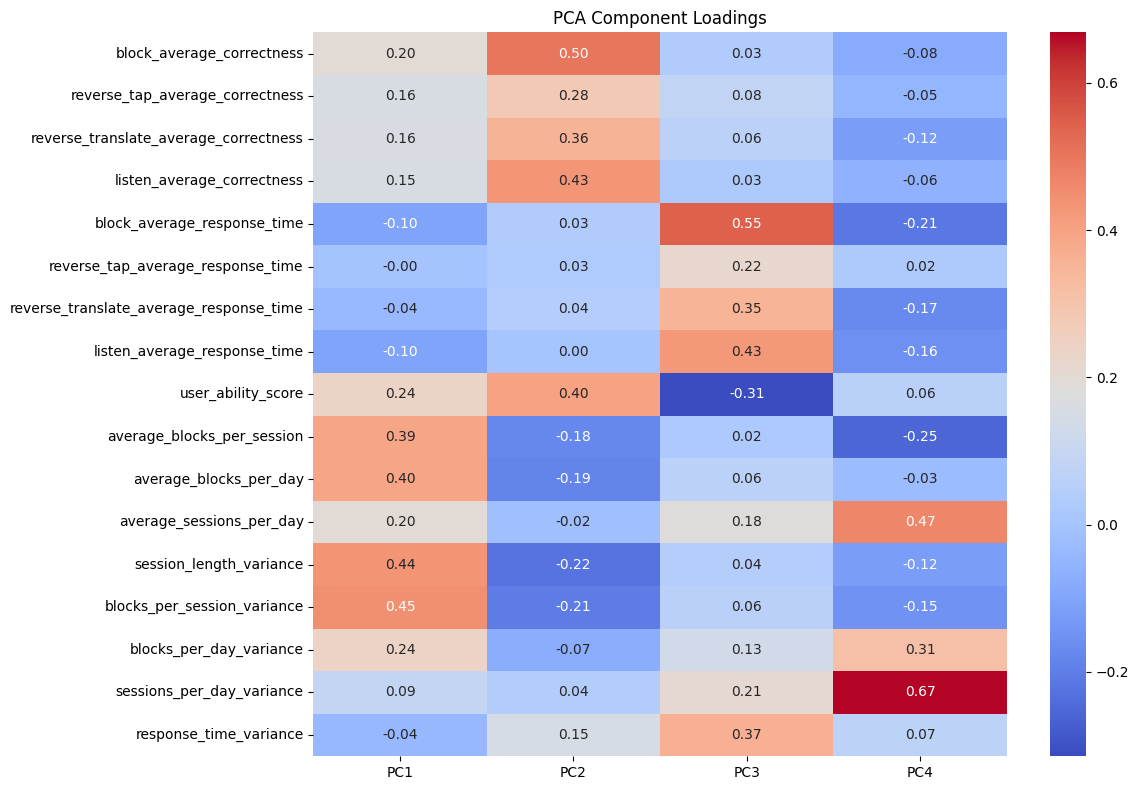

In [15]:
# Visualize loadings with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('PCA Component Loadings')
plt.tight_layout()
plt.show()

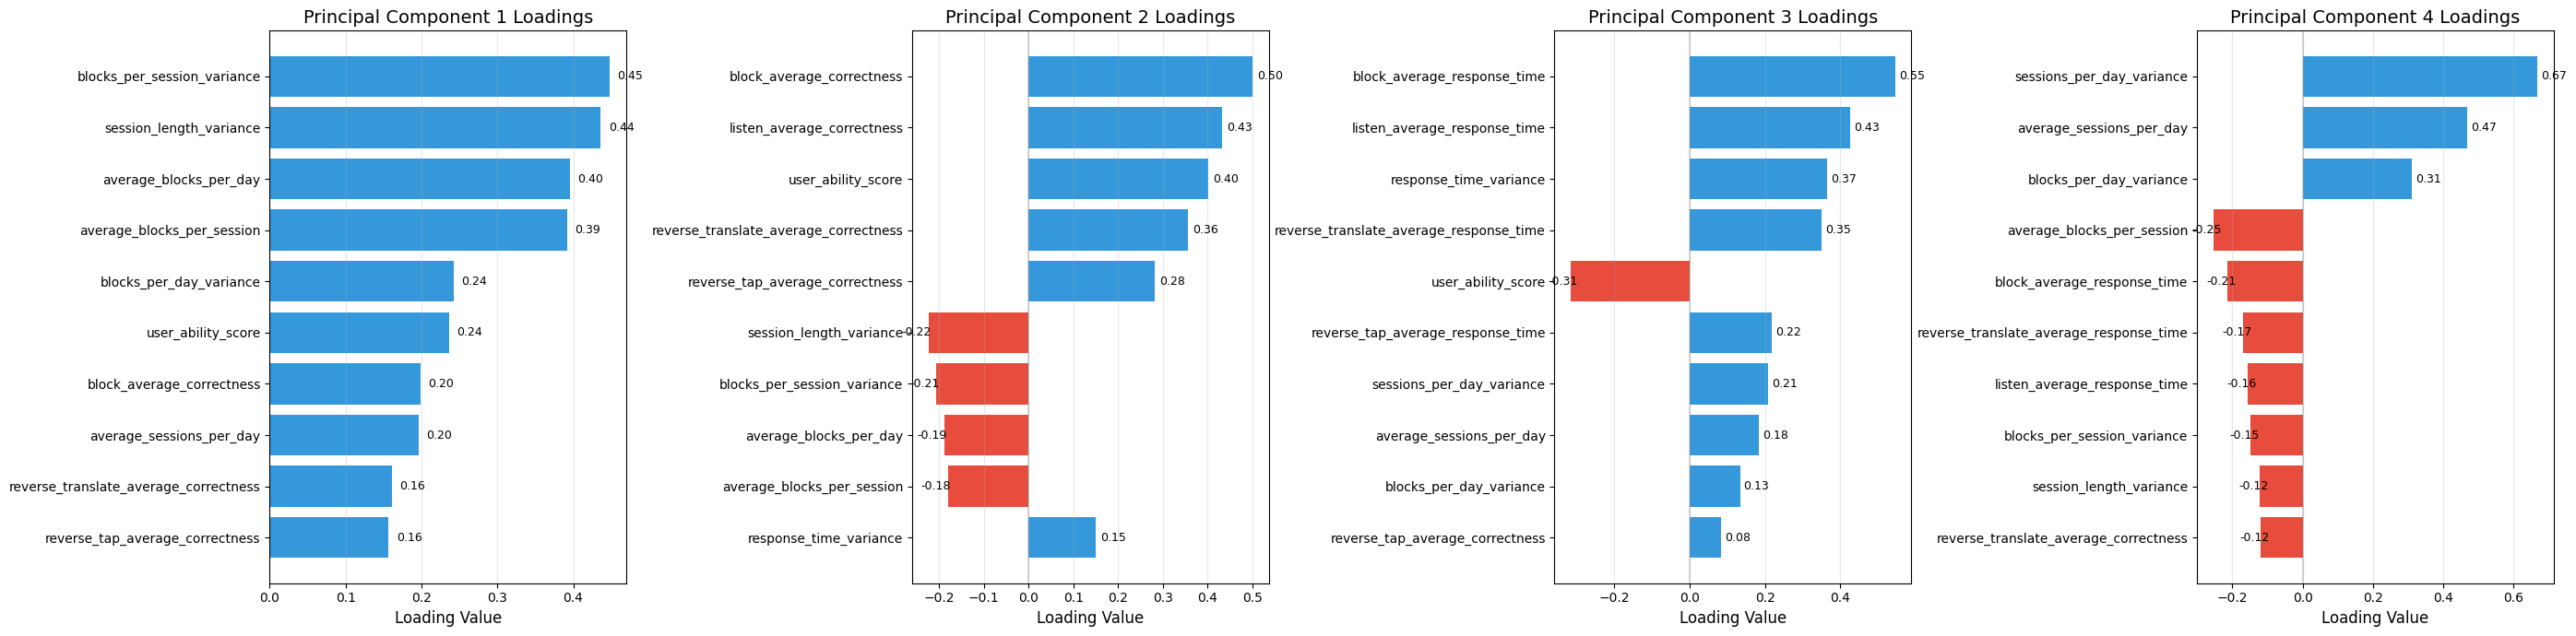

In [16]:
plt.figure(figsize=(28, 7))
colors = ['#3498db', '#e74c3c']  # Blue for positive, red for negative

for i in range(n_components):
    plt.subplot(1, 4, i+1)
    
    # Sort loadings by absolute magnitude, keep top 10, and reverse order
    component_loadings = loadings[f'PC{i+1}'].sort_values(key=abs, ascending=False).head(10).iloc[::-1]
    
    bars = plt.barh(range(len(component_loadings)), component_loadings.values, 
                   color=[colors[0] if x >= 0 else colors[1] for x in component_loadings.values])
    
    plt.yticks(range(len(component_loadings)), component_loadings.index)
    plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
    plt.grid(axis='x', alpha=0.3)
    
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 0.01 if width > 0 else width - 0.06
        plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}', 
                va='center', fontsize=9, color='black')
    
    plt.title(f'Principal Component {i+1} Loadings', fontsize=14)
    plt.xlabel('Loading Value', fontsize=12)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.8)
plt.show()

# Interpreting the Four Principal Components

## Principal Component 1: Engagement Variability and Engagement Intensity

This component shows regularity and intensity of platform usage:

- All loadings are positive, suggesting a general measure of activity level
- Strong positive loadings for activity metrics (variance measures, blocks per day, blocks per session)
- Moderate positive loadings for user ability score and correctness variables

Interpretation: PC1 represents engagement variability combined with engagement intensity. Users with high PC1 scores show both inconsistent learning patterns (highly variable session lengths and exercise counts) and higher overall activity levels. While performance metrics contribute positively, they're less influential than the engagement pattern variables. This dimension primarily distinguishes between casual, irregular users (low scores) and active but somewhat unpredictable users (high scores) whose engagement intensity fluctuates significantly between sessions.

## Principal Component 2: Learning Performance vs. Learning Structure

This component reveals a contrast between learning performance and learning approach:

- Strong positive loadings for correctness metrics across all exercise types
- Strong positive loading for user ability score
- Negative loadings for structure metrics

Interpretation: PC2 contrasts effective performance with structured learning. Users with high PC2 scores demonstrate better accuracy and ability but with less structured learning patterns. Those with low PC2 scores show more consistent session structures but lower performance. This suggests that those with prior knowledge or language talent may need less structured practice to perform well than those still mastering basics.

## Principal Component 3: Response Time and Learning Efficiency

This component captures the speed-ability tradeoff in language learning:

- Strong positive loadings for all response time variables (block, listen, reverse translate, reverse tap)
- Strong negative loading for user ability score
- Positive loadings for session structure variables (variance measures)

Interpretation: PC3 represents a spectrum from efficient, capable learners to users who take longer to respond but may be more deliberate. Users with high PC3 scores spend more time on each exercise and show more variability in their response times, while users with low PC3 scores have higher ability scores and complete exercises more quickly and efficiently.

## Principal Component 4: Learning Schedule Variability

This component reveals patterns in learning schedule:

- Very strong positive loading for sessions_per_day_variance
- Strong positive loadings for average sessions per day and blocks per day variance
- Negative loadings for session structure and response time variables

Interpretation: PC4 represents learning schedule consistency. Users with high PC4 scores have highly variable daily usage patterns - they might study intensively on some days but skip others completely. These users tend to have less intensive sessions (fewer blocks per session) and slower response times. Users with low PC4 scores maintain more consistent daily schedules with more intensive sessions (more blocks per session) and quicker response times.

## Overall Dimensions of User Behavior

1. How variably and intensely they engage (PC1)
2. How accurately they perform (PC2)
3. How quickly they respond (PC3)
4. How consistently they schedule their learning (PC4)

# Hierarchical Clustering on PCA Dimensions

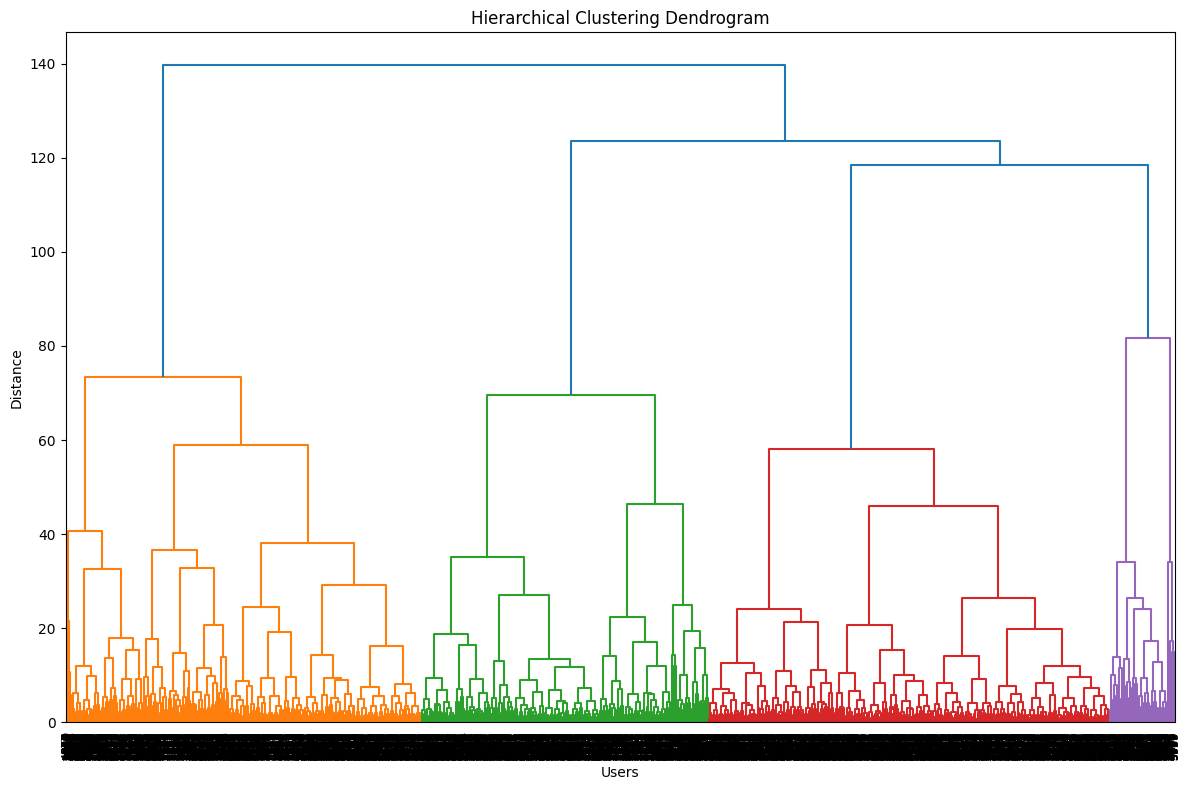

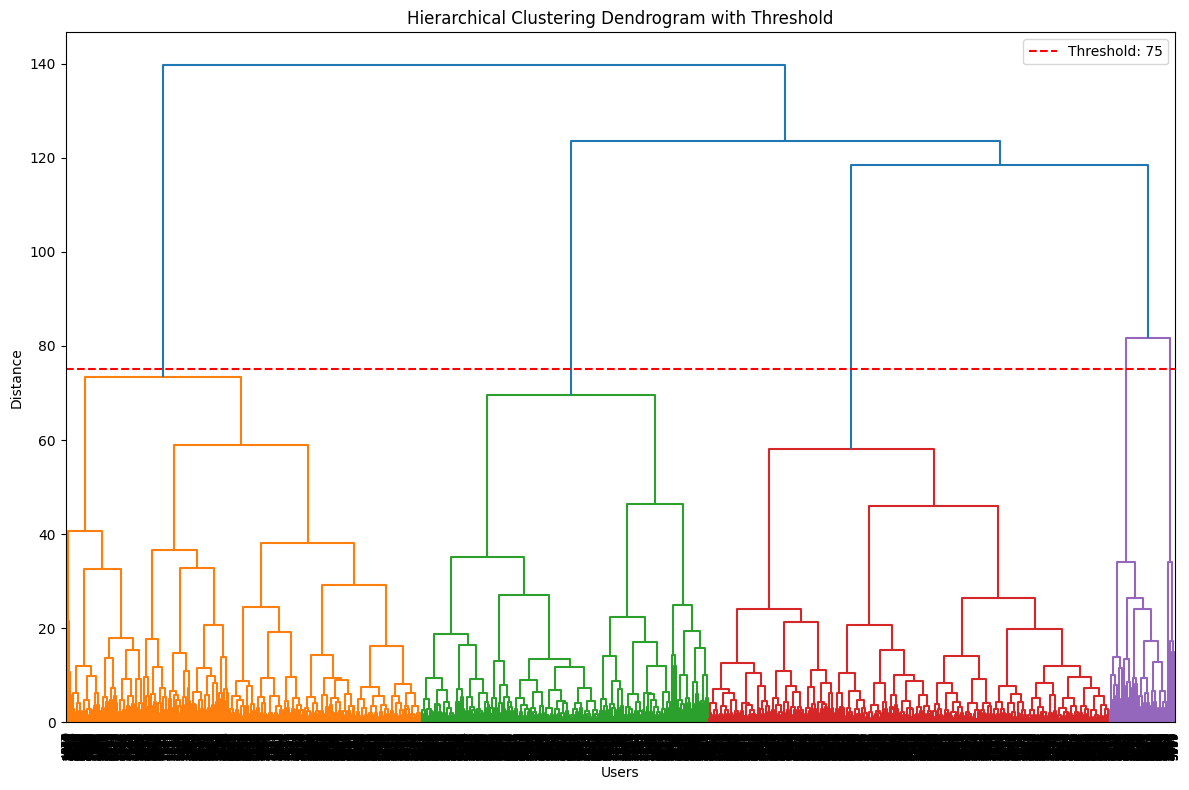

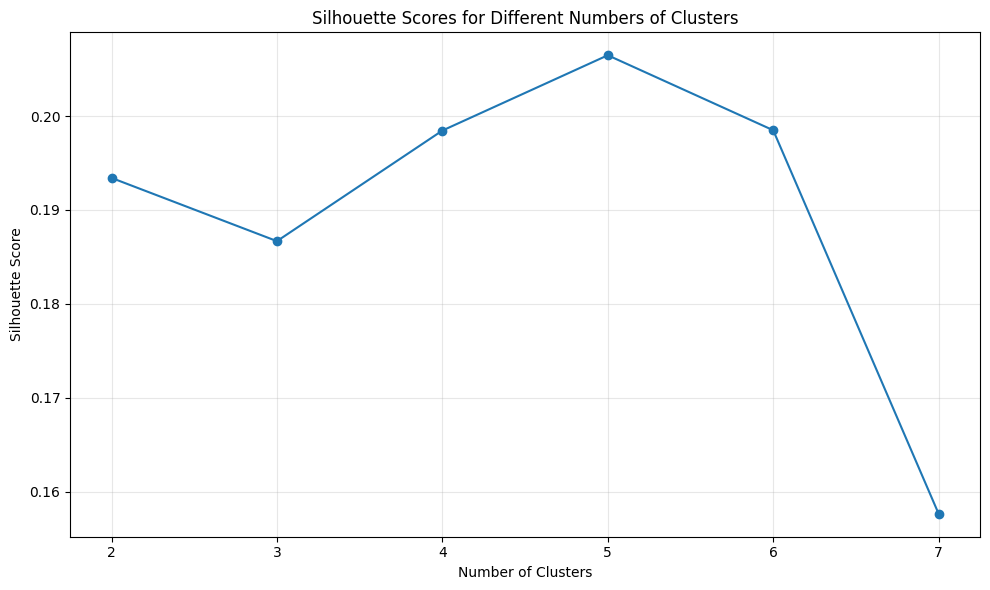

Optimal number of clusters based on silhouette score: 5
Silhouette scores: [np.float64(0.19340846680842616), np.float64(0.18667237745987075), np.float64(0.19845273954997456), np.float64(0.2064751504056652), np.float64(0.19848589173249304), np.float64(0.15762709996857593)]

Cluster profiles in PCA space:
              PC1       PC2       PC3       PC4
Cluster                                        
1        1.768876 -0.745163  0.142766  0.191961
2        0.044460  1.911956 -0.365324 -0.145845
3       -1.345161 -0.725535 -0.565031  0.060293
4       -1.582289  0.101935  4.311145 -0.776819

Cluster sizes:
Cluster
1    1771
2    1430
3    1995
4     324
Name: count, dtype: int64


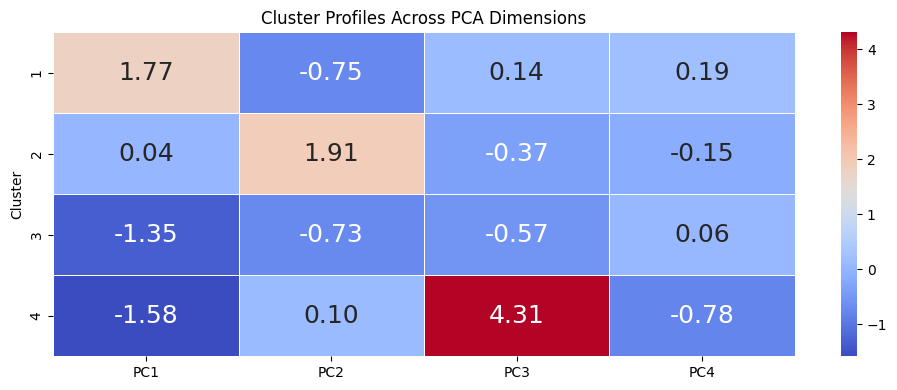

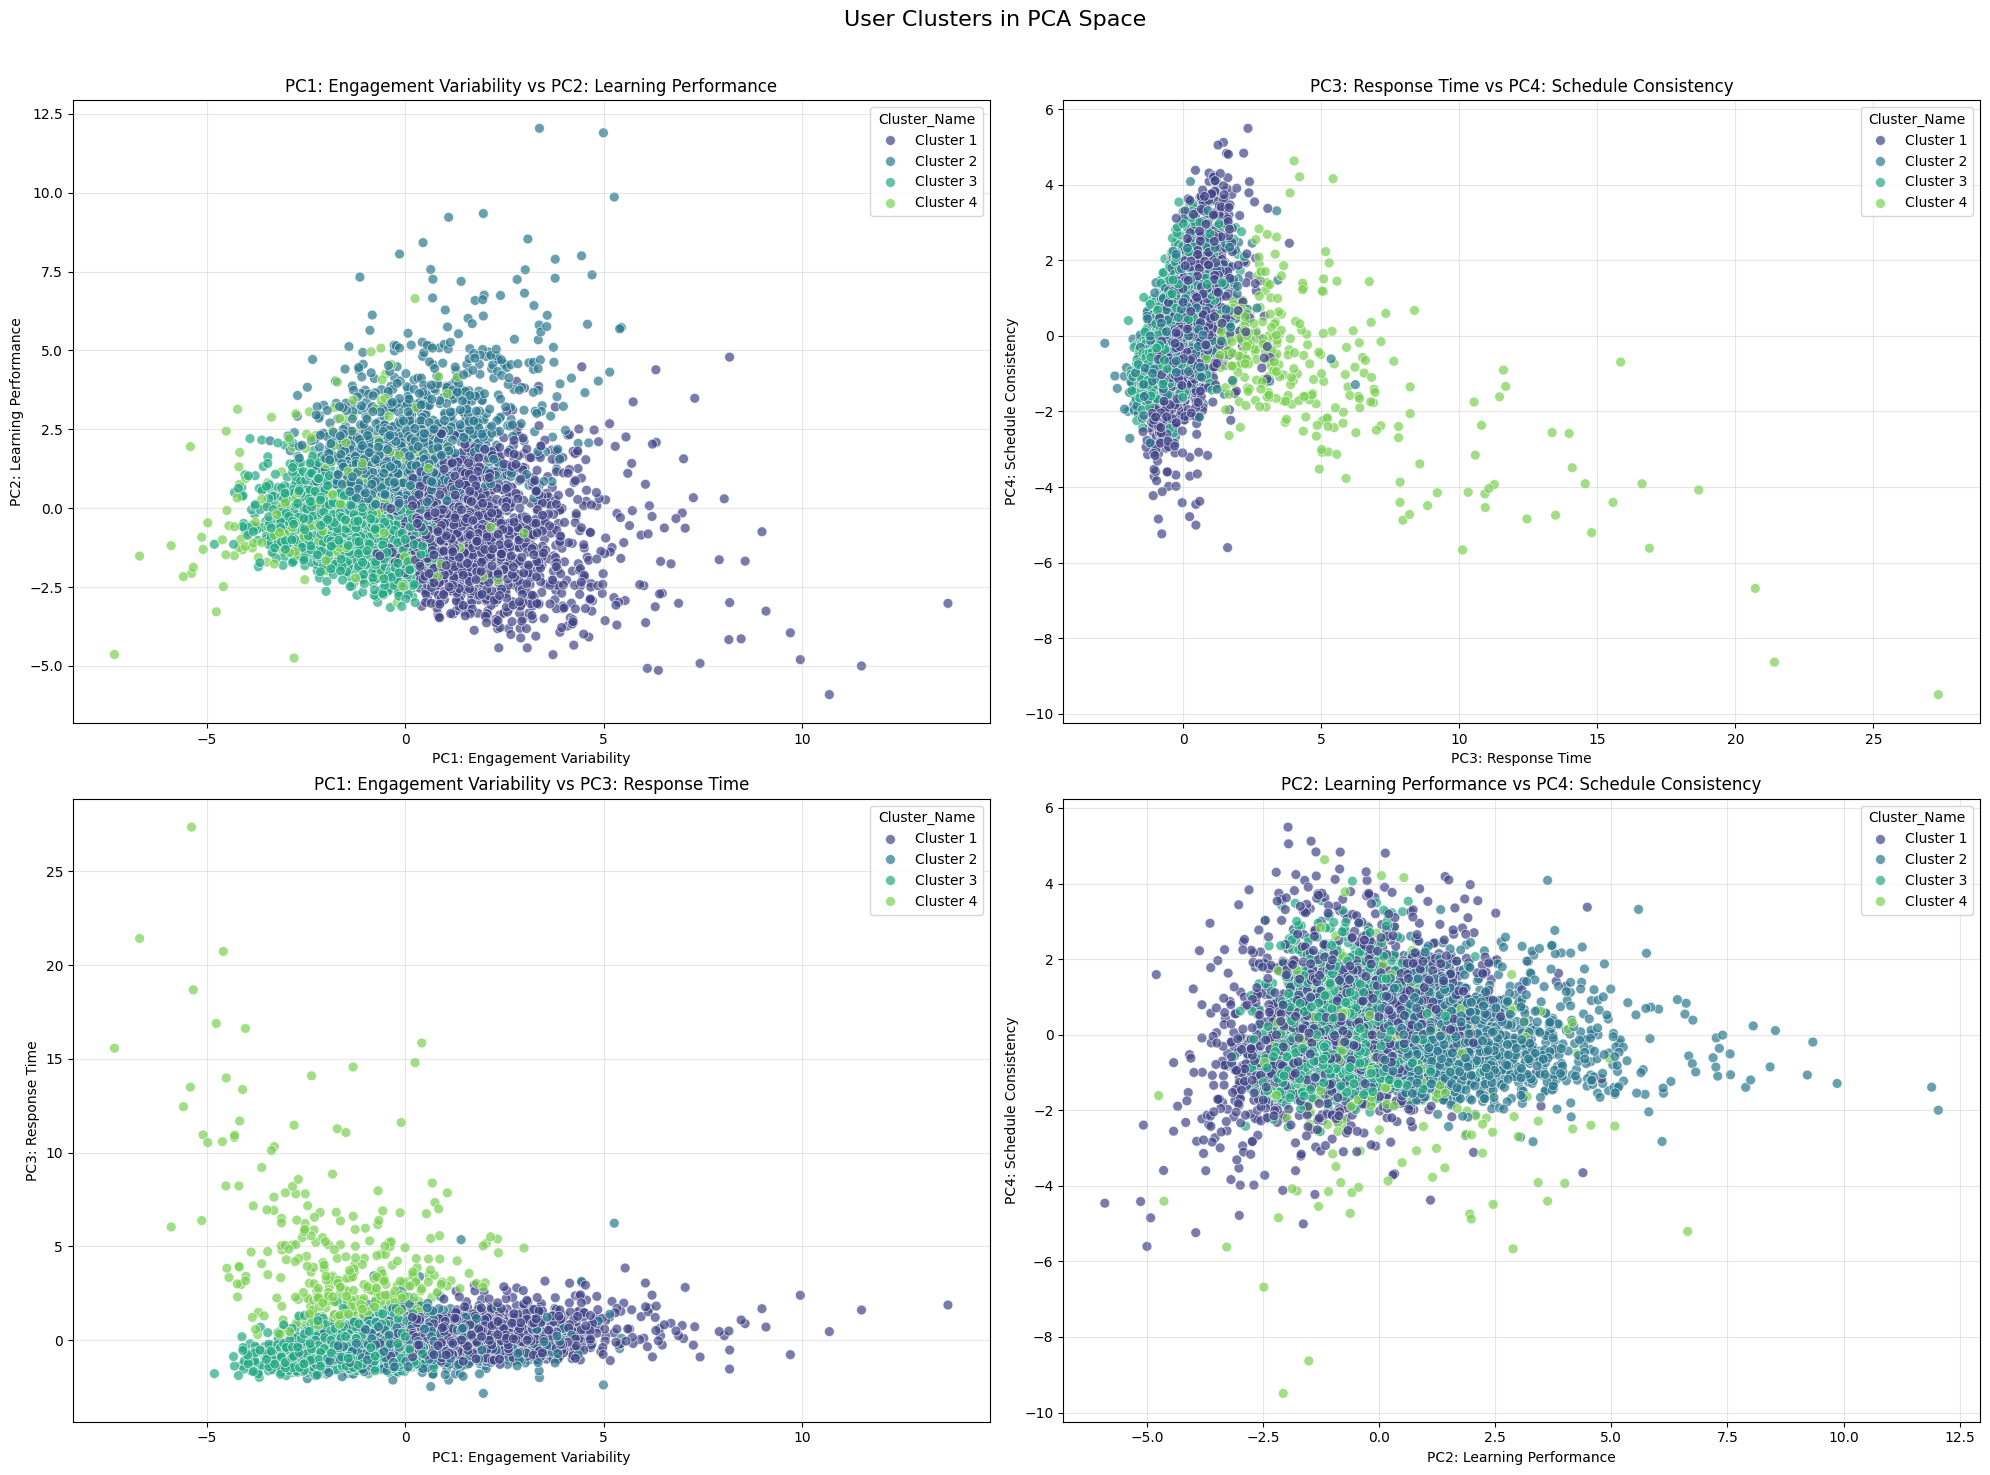

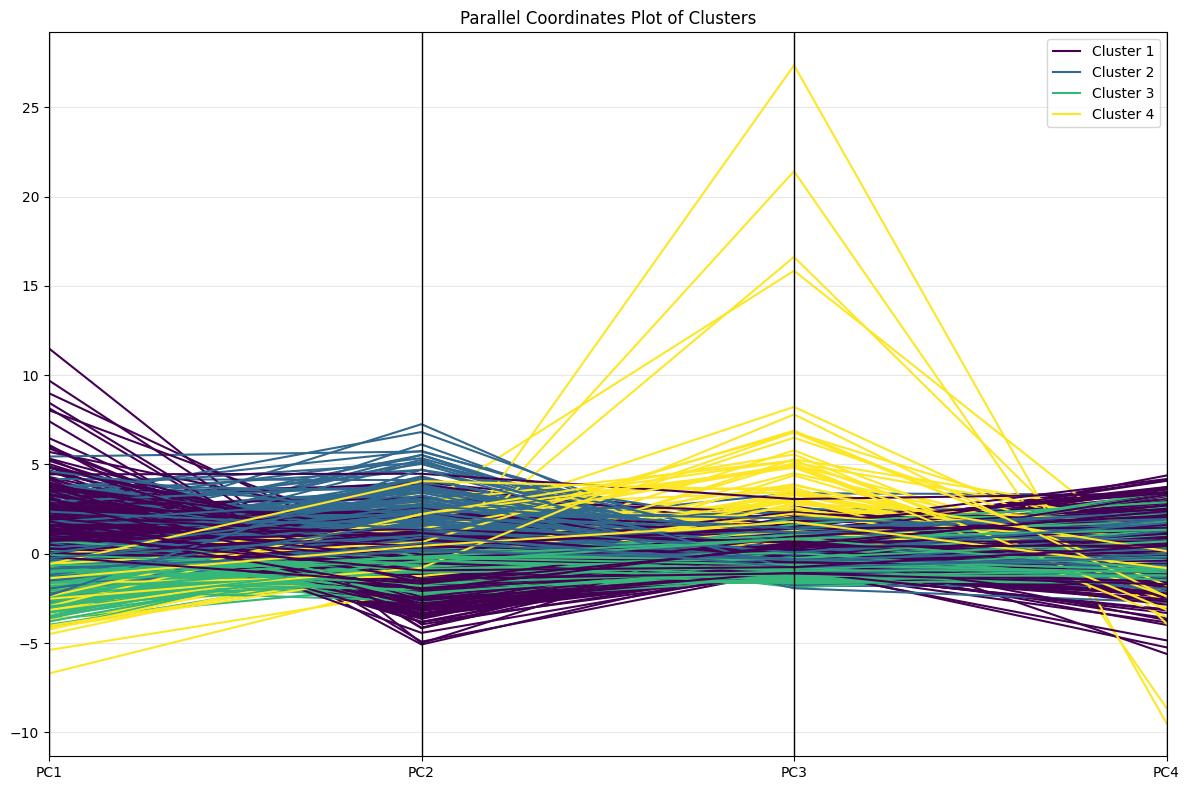


Cluster Descriptions Based on PCA Dimensions:

Cluster 1:
  High scores in: PC1
  Low scores in: PC2
  Moderate scores in: PC3, PC4
  Size: 1771 users (32.1% of total)

Cluster 2:
  High scores in: PC2
  Moderate scores in: PC1, PC3, PC4
  Size: 1430 users (25.9% of total)

Cluster 3:
  Low scores in: PC1, PC2, PC3
  Moderate scores in: PC4
  Size: 1995 users (36.1% of total)

Cluster 4:
  High scores in: PC3
  Low scores in: PC1, PC4
  Moderate scores in: PC2
  Size: 324 users (5.9% of total)


In [17]:
# Perform hierarchical clustering with Ward's method
Z = linkage(X_pca, method='ward')

# Plot the initial dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Plot dendrogram with threshold line at height 75
threshold_value = 75
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram with Threshold')
plt.xlabel('Users')
plt.ylabel('Distance')
plt.axhline(y=threshold_value, color='r', linestyle='--', label=f'Threshold: {threshold_value}')
plt.legend()
plt.tight_layout()
plt.show()

# Verify optimal number of clusters with silhouette analysis
silhouette_scores = []
cluster_range = range(2, 8)  # Test 2-7 clusters

for n_clusters in cluster_range:
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    if len(np.unique(clusters)) > 1:  # Ensure at least 2 clusters exist
        silhouette_scores.append(silhouette_score(X_pca, clusters))
    else:
        silhouette_scores.append(0)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.xticks(cluster_range)
plt.tight_layout()
plt.show()

# Find optimal number of clusters
optimal_index = np.argmax(silhouette_scores)
optimal_n_clusters = cluster_range[optimal_index]
print(f"Optimal number of clusters based on silhouette score: {optimal_n_clusters}")
print(f"Silhouette scores: {silhouette_scores}")

# Based on dendrogram visualization, extract 4 clusters
n_clusters = 4  # You can change this to optimal_n_clusters if silhouette suggests a different value
clusters = fcluster(Z, n_clusters, criterion='maxclust')

# Create a DataFrame with PCA dimensions and cluster assignments
user_segments = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
user_segments['Cluster'] = clusters

# Map cluster IDs to names for readability
cluster_names = {
    1: "Cluster 1",
    2: "Cluster 2",
    3: "Cluster 3",
    4: "Cluster 4"
}
user_segments['Cluster_Name'] = user_segments['Cluster'].map(cluster_names)

# Only calculate means for numeric columns
cluster_profiles = user_segments.groupby('Cluster')[['PC1', 'PC2', 'PC3', 'PC4']].mean()
print("\nCluster profiles in PCA space:")
print(cluster_profiles)

# Analyze cluster sizes
cluster_sizes = user_segments['Cluster'].value_counts().sort_index()
print("\nCluster sizes:")
print(cluster_sizes)

# Create a heatmap to visualize cluster profiles
plt.figure(figsize=(10, 4))
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 18})
plt.title('Cluster Profiles Across PCA Dimensions')
plt.tight_layout()
plt.show()

# Visualize clusters in PCA space
plt.figure(figsize=(20, 15))
scatter_pairs = [(0, 1), (2, 3), (0, 2), (1, 3)]
component_names = [
    "PC1: Engagement Variability", 
    "PC2: Learning Performance", 
    "PC3: Response Time", 
    "PC4: Schedule Consistency"
]

for i, (pc1_idx, pc2_idx) in enumerate(scatter_pairs):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(
        x=f'PC{pc1_idx+1}', 
        y=f'PC{pc2_idx+1}', 
        hue='Cluster_Name',
        data=user_segments,
        palette='viridis',
        s=50,
        alpha=0.7
    )
    plt.title(f'{component_names[pc1_idx]} vs {component_names[pc2_idx]}')
    plt.grid(True, alpha=0.3)
    plt.xlabel(component_names[pc1_idx])
    plt.ylabel(component_names[pc2_idx])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('User Clusters in PCA Space', fontsize=16)
plt.show()

# Create parallel coordinates plot to visualize cluster characteristics
plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(
    user_segments.sample(min(1000, len(user_segments))),  # Sample to avoid overcrowding
    'Cluster_Name',
    cols=['PC1', 'PC2', 'PC3', 'PC4'],
    colormap='viridis'  # Use colormap name as string instead of plt.cm object
)
plt.title('Parallel Coordinates Plot of Clusters')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cluster descriptions based on PCA interpretations
cluster_descriptions = {
    'Cluster 1': cluster_profiles.iloc[0].to_dict(),
    'Cluster 2': cluster_profiles.iloc[1].to_dict(),
    'Cluster 3': cluster_profiles.iloc[2].to_dict(),
    'Cluster 4': cluster_profiles.iloc[3].to_dict()
}

print("\nCluster Descriptions Based on PCA Dimensions:")
for cluster, profile in cluster_descriptions.items():
    print(f"\n{cluster}:")
    high_dims = [f"PC{i+1}" for i, val in enumerate(profile.values()) if val > 0.5]
    low_dims = [f"PC{i+1}" for i, val in enumerate(profile.values()) if val < -0.5]
    mid_dims = [f"PC{i+1}" for i, val in enumerate(profile.values()) if -0.5 <= val <= 0.5]
    
    if high_dims:
        print(f"  High scores in: {', '.join(high_dims)}")
    if low_dims:
        print(f"  Low scores in: {', '.join(low_dims)}")
    if mid_dims:
        print(f"  Moderate scores in: {', '.join(mid_dims)}")
    
    # Size of this cluster
    size = cluster_sizes[int(cluster.split()[-1])]
    percentage = 100 * size / cluster_sizes.sum()
    print(f"  Size: {size} users ({percentage:.1f}% of total)")

# User Segment Analysis & Retention Strategy Mapping

## Cluster 1: "Persistent Challengers" (32.1%)

Profile: These users show high engagement despite struggling with performance.
- High engagement variability (PC1)
- Low performance accuracy (PC2)
- Moderate response time (PC3) and schedule consistency (PC4)

Retention Strategy:
- Provide more detailed explanations for incorrect answers
- Implement adaptive difficulty adjustment based on performance
- Create "practice mode" for challenging concepts without penalizing errors

## Cluster 2: "Efficient Achievers" (25.9%)

Profile: These users demonstrate high performance with moderate effort across other dimensions. They seem to have prior knowledge that helps them excel.
- High performance accuracy (PC2)
- Moderate engagement variability (PC1), response time (PC3), and schedule consistency (PC4)

Retention Strategy:
- Showcase their achievements with special badges
- Unlock premium content or advanced lessons based on performance
- Implement competitive elements like leaderboards for this achievement-oriented group

## Cluster 3: "Casual Explorers" (36.1% - largest segment)

Profile: These users show minimal commitment across most metrics, perhaps using the app out of curiosity rather than serious learning intent.
- Low engagement variability (PC1), performance accuracy (PC2), and response time (PC3)
- Moderate schedule consistency (PC4)

Retention Strategy:
- Implement bite-sized daily goals
- Lower initial difficulty to build confidence
- Provide immediate positive feedback for any achievement

## Cluster 4: "Deep Thinkers" (5.9%)

Profile: These users take their time with exercises, suggesting a deliberate approach to language learning.
- High response time (PC3)
- Low engagement variability (PC1) and schedule consistency (PC4)
- Moderate performance accuracy (PC2)

Retention Strategy:
- Remove time pressures from exercises
- Recognize and reward accuracy over speed
- Implement "pick up where you left off" features